<a href="https://colab.research.google.com/github/othrou/Fine-Tuning-YOLOv10n-for-human-detection-/blob/main/Fine_Tuning_Yolo_v10_humanDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d fareselmenshawii/human-dataset


Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/human-dataset
License(s): CC0-1.0
100% 5.31G/5.33G [00:59<00:00, 103MB/s]
100% 5.33G/5.33G [00:59<00:00, 96.0MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("human-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 13.9 MB/s eta 0:00:00


In [5]:
# Verify the contents
!ls data

images	labels


In [6]:
# Create data.yaml
data_yaml = """
# data.yaml

train: /content/data/images/train  # Full path to training images
val: /content/data/images/val      # Full path to validation images

nc: 1  # Number of classes (change if needed)
names: ['person']  # Class names


"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)


In [9]:
from ultralytics import YOLO

# Load YOLOv10n model from scratch
model = YOLO("yolov10n.yaml")

# Train the model
model.train(data="data.yaml", epochs=5, imgsz=640, batch=32)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=data.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

train: Scanning /content/data/labels/train.cache... 13754 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13754/13754 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/data/labels/val.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      7.71G      6.038      7.902      6.502        137        640: 100%|██████████| 430/430 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:57<00:00,  1.10it/s]


                   all       4000      16377      0.111      0.101     0.0389     0.0127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      10.4G       4.46      5.473      4.266        280        640: 100%|██████████| 430/430 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


                   all       4000      16377      0.285      0.197      0.149     0.0596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      8.19G      4.145      4.944      3.865        171        640: 100%|██████████| 430/430 [06:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:54<00:00,  1.15it/s]


                   all       4000      16377      0.289      0.233      0.167     0.0671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      10.3G      3.926      4.615      3.674        267        640: 100%|██████████| 430/430 [06:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:54<00:00,  1.15it/s]


                   all       4000      16377      0.357      0.265      0.229      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      9.29G      3.778      4.361      3.541        230        640: 100%|██████████| 430/430 [06:16<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:55<00:00,  1.14it/s]


                   all       4000      16377      0.414      0.311      0.289      0.133

5 epochs completed in 0.614 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.7MB

Validating runs/detect/train3/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:54<00:00,  1.17it/s]


                   all       4000      16377      0.414      0.311      0.289      0.133
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ceaec5380d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Perform inference
results = model(imgs)

results
# Print and display the results
# for result in results:
#     result.print()  # Print detected classes and confidence
#     result.show()   # Display the image with detections


0: 384x640 1 person, 65.5ms
Speed: 4.7ms preprocess, 65.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[44, 51, 76],
         [43, 50, 75],
         [41, 48, 73],
         ...,
         [20, 18, 54],
         [18, 16, 52],
         [17, 15, 51]],
 
        [[44, 51, 76],
         [43, 50, 75],
         [41, 48, 73],
         ...,
         [20, 18, 54],
         [18, 16, 52],
         [18, 16, 52]],
 
        [[44, 51, 76],
         [43, 50, 75],
         [41, 48, 73],
         ...,
         [21, 18, 57],
         [19, 16, 55],
         [18, 15, 54]],
 
        ...,
 
        [[53, 44, 40],
         [52, 43, 39],
         [51, 42, 38],
         ...,
         [50, 50, 38],
         [51, 51, 39],
         [52, 52, 40]],
 
        [[53, 44, 40],
         [52, 43, 39],
         [51, 42, 38],
         ...,
         [50, 50, 38],
         [51, 51, 39],
         [52, 52, 40]],
 
        [[53, 44, 40],
    

In [19]:
# Initialize an empty list to store results
all_results = []

# Iterate through the list of results
for result in results:
    # Show and save results for each image
    #result.show()
    #result.save()  # or .plot()

    # Extract information from result
    for box in result.boxes:
        # Extract the bounding box coordinates, confidence, class, and name
        xmin, ymin, xmax, ymax = box.xyxy[0].tolist()
        confidence = box.conf.item()
        class_id = box.cls.item()
        class_name = result.names[int(class_id)]

        # Append to the list as a dictionary
        all_results.append({
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax,
            'confidence': confidence,
            'class': class_id,
            'name': class_name
        })

# Convert the list of dictionaries to a pandas DataFrame
df_results = pd.DataFrame(all_results)

# Display the DataFrame with selected columns
columns = ['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name']
df_results_filtered = df_results[columns]

# Print the filtered DataFrame
print(df_results_filtered)

         xmin       ymin         xmax        ymax  confidence  class    name
0  709.508362  29.490143  1265.206421  714.007751    0.410462    0.0  person


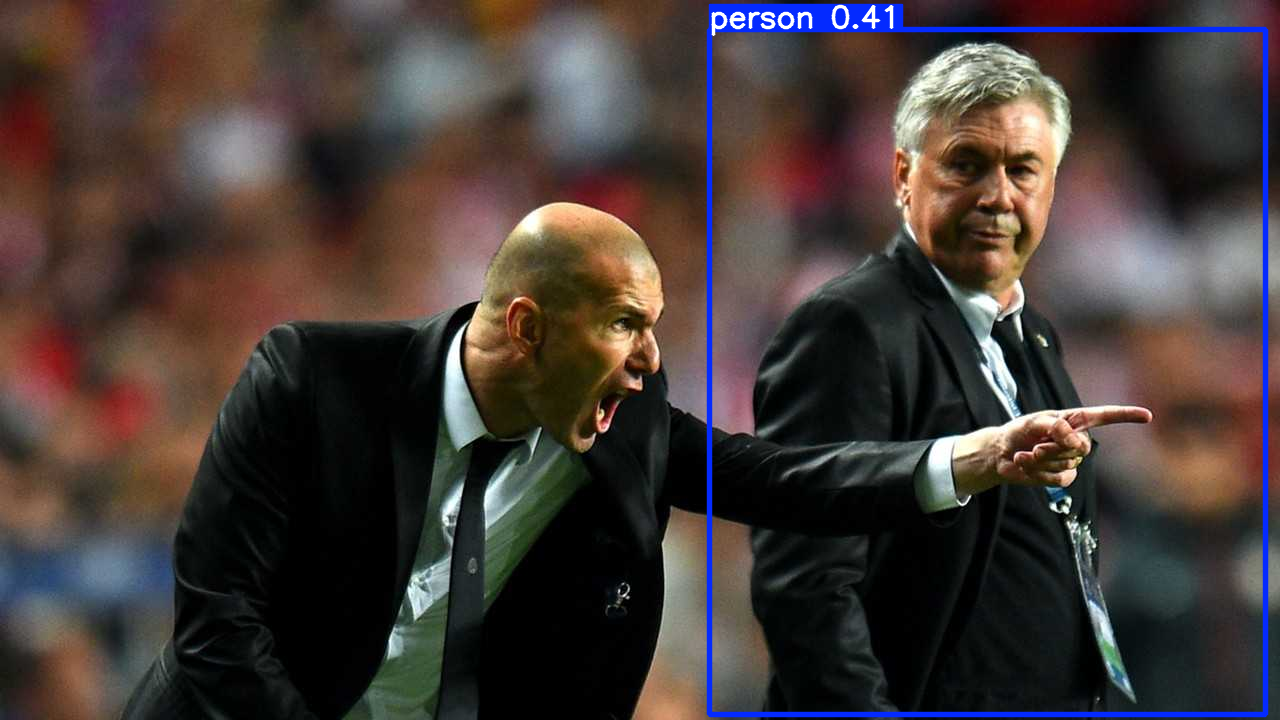

In [13]:
for item in results:
    item.show()  # This works if each item in results has a show() method.


In [20]:
# Get the dictionary mapping class IDs to class names
class_dict = model.names

# Print the class dictionary
print("Class Dictionary:", class_dict)

# Get the number of classes
num_classes = len(class_dict)
print("Number of classes the model can recognize:", num_classes)

Class Dictionary: {0: 'person'}
Number of classes the model can recognize: 1


**Exporting the model to tf-lite format**

In [21]:
# Export the model to TFLite format
model.export(format="tflite")  # creates 'yolo11n_float32.tflite'

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.30GHz)

PyTorch: starting from 'runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 164.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 216.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 209.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 125.9 MB/s eta 0:00:

100%|██████████| 1.11M/1.11M [00:00<00:00, 19.8MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 42.88file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.37...
ONNX: export success ✅ 3.0s, saved as 'runs/detect/train3/weights/best.onnx' (9.0 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 64.4s, saved as 'runs/detect/train3/weights/best_saved_model' (22.8 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/train3/weights/best_saved_model/best_float32.tflite' (9.0 MB)

Export complete (66.8s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train3/weights/best_saved_model/best_float32.tflite imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'runs/detect/train3/weights/best_saved_model/best_float32.tflite'

In [22]:
# Load the exported TFLite model
tflite_model = YOLO("runs/detect/train3/weights/best_saved_model/best_float32.tflite")

# Run inference
results = tflite_model("https://ultralytics.com/images/bus.jpg")

Loading runs/detect/train3/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...



100%|██████████| 134k/134k [00:00<00:00, 6.08MB/s]


image 1/1 /content/bus.jpg: 640x640 2 persons, 144.9ms
Speed: 3.9ms preprocess, 144.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


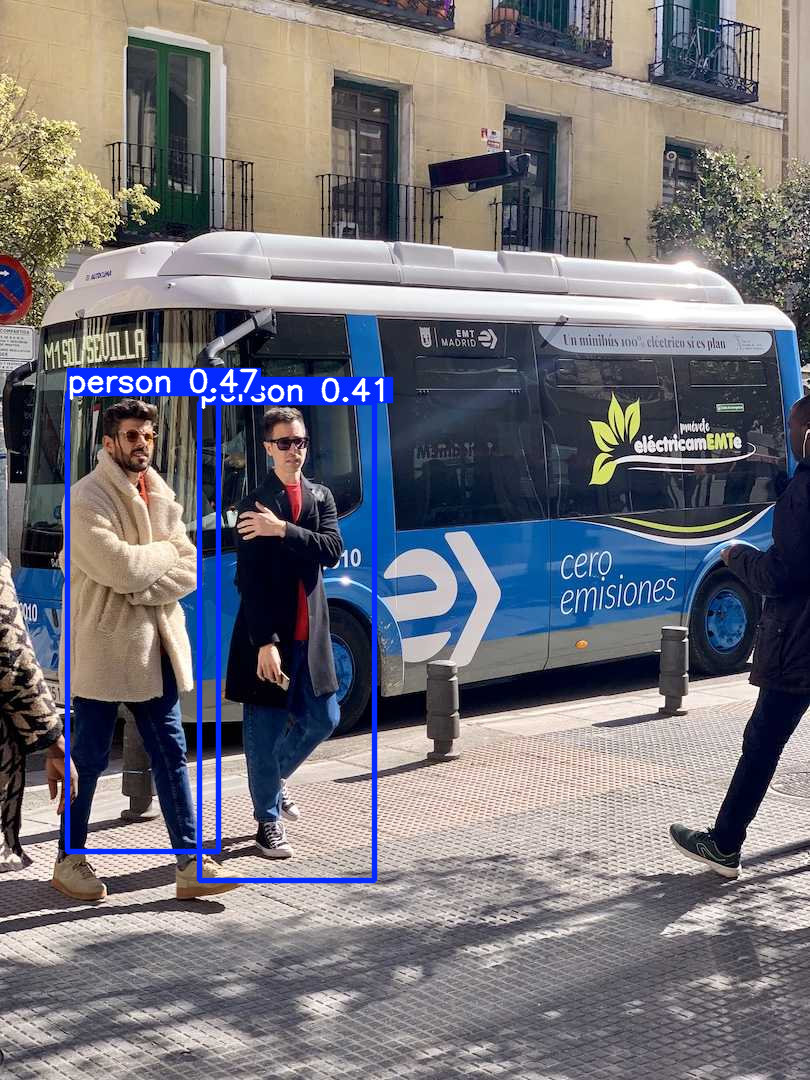

In [24]:
for item in results:
    item.show()  # This works if each item in results has a show() method.